In [1]:
from stock_utils import *

In [ ]:
def get_rsi(close, period=14, average='simple'):
    up = 0
    down = 0
    for i in range(-period, 0):
        #print(close[i])
        #print(close[i - 1])
        #print()
        if close[i] > close[i - 1]:
            up += close[i] - close[i - 1]
            #print('up')
        elif close[i] < close[i - 1]:
            down += close[i - 1] - close[i]
            #print('down')
    if average == 'simple':
        relative_strength_factor = up / down
    #elif average == 'exponential' or average == 'e' or average == 'exp':
        #relative_strength_factor =
    rsi = 100 - (100 / (1 + relative_strength_factor))
    #print('Up is ' + str(up))
    #print('Down is ' + str(down))
    #print('RSF is ' + str(relative_strength_factor))
    return rsi

In [92]:
df = pd.DataFrame()
df = df.from_csv('stock_data/mu.csv')
df = df.sort_index(axis=0)

daily_movements = get_price_movement_percentages(df)
close = get_close_price(df)

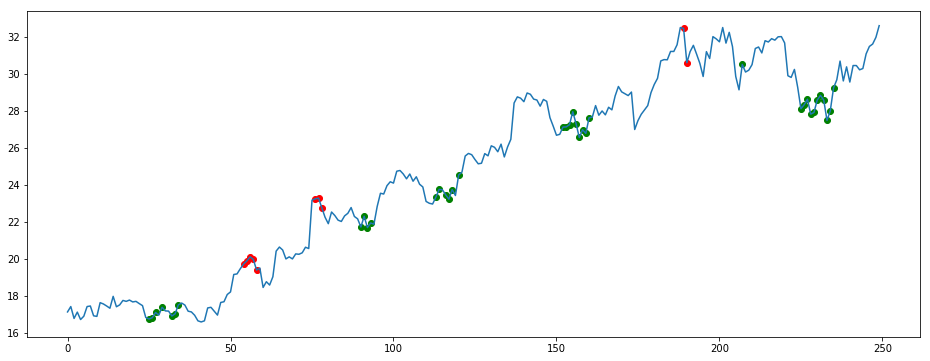

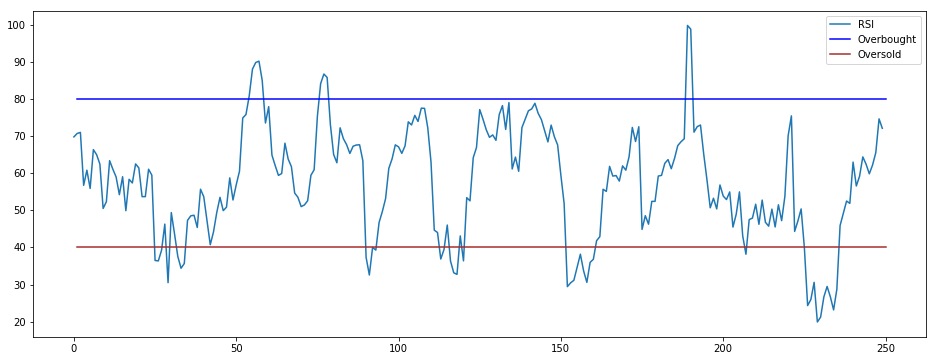

In [97]:
rsi_list = []
ob_threshold = 80
os_threshold = 40
period = 14

viewing_window = 250
for i in range(-viewing_window, -1):
    rsi_list.append(get_rsi(close[0:i], period=period ))
rsi_list.append(get_rsi(close, period=period))

buy_signals = []
sell_signals = []
for i in range(len(rsi_list)):
    if rsi_list[i] > ob_threshold:
        sell_signals.append((i, close[-viewing_window + i]))
    elif rsi_list[i] < os_threshold:
        buy_signals.append((i, close[-viewing_window + i]))
        


## Close and buy/sell signals
plt.figure(figsize=(16,6))
plt.plot(close[-viewing_window:])

for i in range(len(buy_signals)):
    plt.scatter(buy_signals[i][0], buy_signals[i][1], c='green')
for i in range(len(sell_signals)):
    plt.scatter(sell_signals[i][0], sell_signals[i][1], c='red')

plt.show()

## RSI
plt.figure(figsize=(16,6))
plt.plot(rsi_list, label='RSI')
plt.plot(np.linspace(1,viewing_window,viewing_window), np.linspace(ob_threshold,ob_threshold,viewing_window), 
         label='Overbought', c='blue')
plt.plot(np.linspace(1,viewing_window,viewing_window), np.linspace(os_threshold,os_threshold,viewing_window), 
         label='Oversold', c='brown')
plt.legend()
plt.show()

            